In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from textblob import TextBlob

In [2]:
df=pd.read_csv("twitter_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
import re

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


In [5]:
def process_twee(tweet):
    tweet = tweet[tweet.find(':'):]
    out = " ".join(re.findall(r'(?i)\b[a-z]+\b', tweet))
    return out

df['tweet'].apply(process_twee)

0        As a woman you shouldn t complain about cleani...
1        boy dats cold tyga dwn bad for cuffin dat hoe ...
2        You ever fuck a bitch and she start to cry You...
3                                   she look like a tranny
4        The shit you hear about me might be true or it...
                               ...                        
24778    right His TL is trash Now mine Bible scripture...
24779                                                    y
24780                                                    n
24781                                                    s
24782                                                 t co
Name: tweet, Length: 24783, dtype: object

In [6]:
def sentiment(tweet):
    blob = TextBlob(tweet)
    out = []
    for sentence in blob.sentences:
        out.append(sentence.sentiment.polarity)
    return out

df["sentiment"] = df['tweet'].apply(sentiment)

In [7]:
def total_sentiment(s):
    return sum(s)

df['total_sentiment']=df['sentiment'].apply(total_sentiment)

In [8]:
def subjectivity(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.subjectivity

df['subjectivity']=df['tweet'].apply(subjectivity)


In [9]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,sentiment,total_sentiment,subjectivity
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,"[0.0, 0.0, 0.0, 0.0]",0.000000,0.000000
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[0.0, 0.0, -0.8749999999999998, 0.0]",-0.875000,0.666667
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[0.0, 0.0, 0.0, -0.4, -0.30000000000000004]",-0.700000,0.700000
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[0.0, 0.0, 0.0]",0.000000,0.000000
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[0.0, 0.0, 0.07499999999999998]",0.075000,0.725000
...,...,...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,"[0.3571428571428571, 0.0, 0.0, 0.0]",0.357143,0.535714
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",[-0.55],-0.550000,0.900000
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,"[0.15625, 0.0]",0.156250,0.400000
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,[0.1],0.100000,0.400000


In [18]:
def category(val):
    if val < 0: return 'negative'
    elif val > 0: return 'positive'
    else: return 'neutral'
df['category']=df['total_sentiment'].apply(category)

<Axes: ylabel='count'>

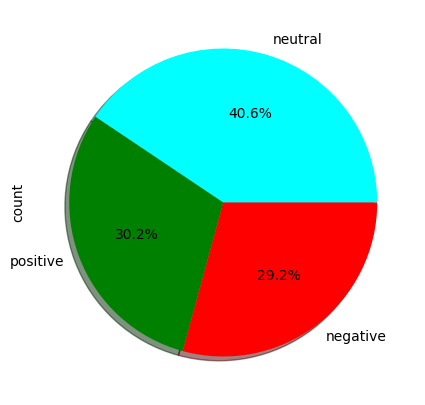

In [24]:
df['category'].value_counts().plot(kind='pie', shadow=True, figsize=(5,5), autopct='%.1f%%', colors=['cyan','green','red'])

<Axes: ylabel='Frequency'>

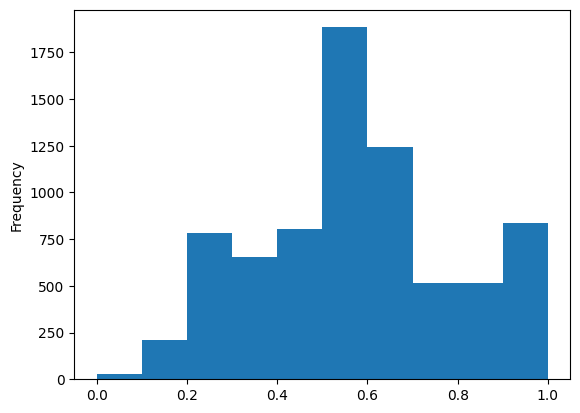

In [26]:
df[df['category'] == 'positive']['subjectivity'].plot(kind='hist')

<Axes: ylabel='Frequency'>

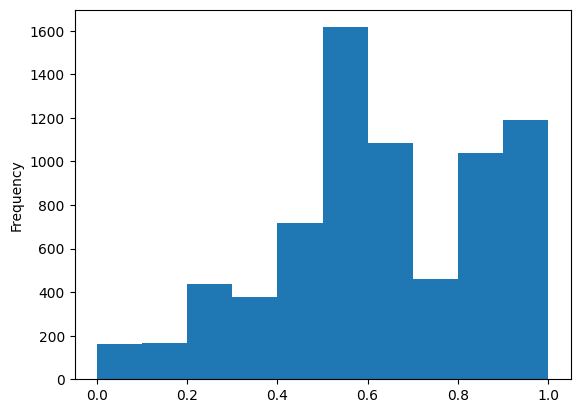

In [27]:
df[df['category'] == 'negative']['subjectivity'].plot(kind='hist')

<Axes: ylabel='Frequency'>

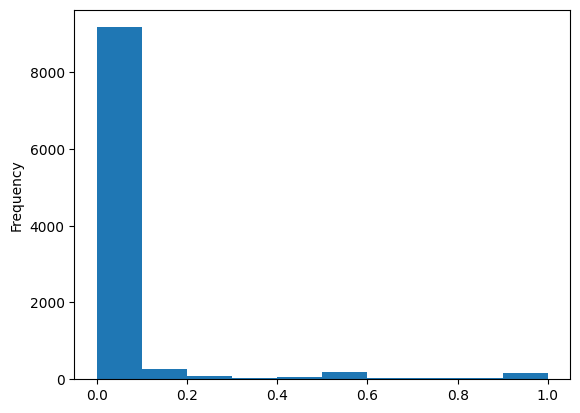

In [28]:
df[df['category'] == 'neutral']['subjectivity'].plot(kind='hist')

<Axes: ylabel='Frequency'>

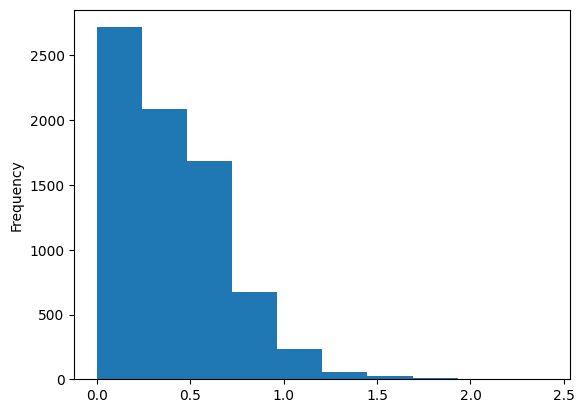

In [29]:
df[df['category'] == 'positive']['total_sentiment'].plot(kind='hist')

<Axes: ylabel='Frequency'>

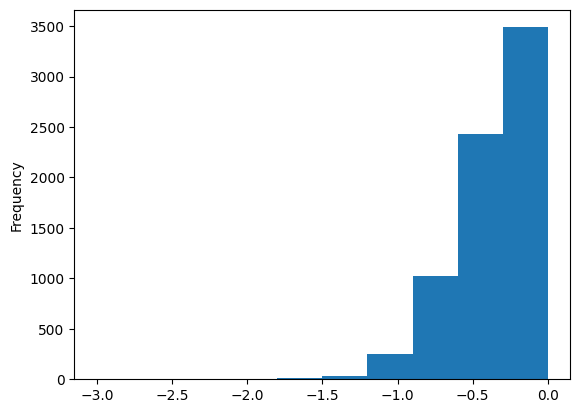

In [30]:
df[df['category'] == 'negative']['total_sentiment'].plot(kind='hist')

In [31]:
df[df['category'] == 'positive'].tweet

4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
10       " Keeks is a bitch she curves everyone " lol I...
17                               " bitch who do you love "
30        " i txt my old bitch my new bitch pussy wetter "
31       " i'd say im back to the old me but my old bit...
                               ...                        
24774    you really care bout dis bitch. my dick all in...
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 7476, dtype: object